In [1]:
import os
evalpath='../results/shape/10/out/evals/'
metrics = [os.path.join(evalpath,f) for f in os.listdir(evalpath) if f.endswith('metrics')]

In [2]:
import pandas as pd
alldata = []
nodata = []
for f in metrics:
    data = pd.read_csv(f, sep = '\t', header = None, names = ['accuracy','AUROC', 'AUPRC', 'TP', 'TN', 'FP', 'FN']
                )
    if '.nodata' in f:
        nodata.append(data)
    else:
        alldata.append(data)
    
alldf = pd.concat(alldata, axis = 0)
allnodatadf = pd.concat(nodata, axis = 0)

In [3]:
alldf.sort_index()

,accuracy,AUROC,AUPRC,TP,TN,FP,FN
203_HNRNPC_HepG2,0.689,0.802,0.176,39,1391,636,10
204_RBFOX2_HepG2,0.706,0.779,0.354,174,1094,459,69
228_SF3B4_HepG2,0.618,0.733,0.564,284,509,396,94
439_KHSRP_K562,0.695,0.794,0.318,462,3547,1614,149
441_PUM2_K562,0.778,0.907,0.741,379,2593,791,59
481_DROSHA_K562,0.729,0.795,0.102,47,2872,1062,22
507_SF3B4_K562,0.739,0.812,0.756,1160,1528,524,426
548_ZRANB2_K562,0.004,0.870,0.031,6,0,1382,0
575_DROSHA_HepG2,0.759,0.742,0.163,77,1840,551,58
676_RBFOX2_K562,0.828,0.760,0.192,76,2409,442,75


In [4]:
allnodatadf.sort_index()

,accuracy,AUROC,AUPRC,TP,TN,FP,FN
203_HNRNPC_HepG2,0.826,0.858,0.674,15420,72186,6879,11560
204_RBFOX2_HepG2,0.516,0.641,0.629,16521,1196,16406,230
228_SF3B4_HepG2,0.765,0.808,0.917,12344,150,3777,67
439_KHSRP_K562,0.597,0.711,0.755,119954,9304,84268,2899
441_PUM2_K562,0.535,0.895,0.450,2204,31301,29005,150
481_DROSHA_K562,0.578,0.801,0.206,1689,78717,58255,410
507_SF3B4_K562,0.748,0.803,0.748,9634,17357,5209,3875
548_ZRANB2_K562,0.093,0.594,0.116,374,0,3648,0
575_DROSHA_HepG2,0.404,0.630,0.283,5804,11546,24155,1436
676_RBFOX2_K562,0.283,0.634,0.415,4973,219,13092,46


In [7]:
df = alldf.merge(allnodatadf, left_index = True, right_index = True, suffixes=('_withSHAPE', '_noSHAPE'))

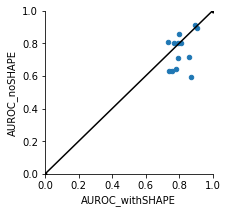

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
df.plot.scatter(x = 'AUROC_withSHAPE', y = 'AUROC_noSHAPE', figsize = (3,3))
plt.plot([0,1], [0,1], color = 'black', marker = '.')
plt.xlim(0,1)
plt.ylim(0,1)
sns.despine()

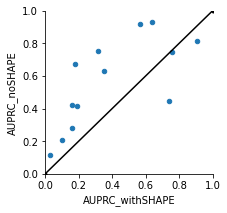

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
df.plot.scatter(x = 'AUPRC_withSHAPE', y = 'AUPRC_noSHAPE', figsize = (3,3))
plt.plot([0,1], [0,1], color = 'black', marker = '.')
plt.xlim(0,1)
plt.ylim(0,1)
sns.despine()